In [8]:
from PIL import Image
import numpy
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances
from numpy import dot
from numpy.linalg import norm
import json
import codecs

In [78]:
data = json.load(codecs.open('generatedData.json', 'r', 'utf-8-sig'))


In [82]:
data[0][0]['childreen'][2]['markers'][0]['properties']['path']

'4386.jpg'

In [83]:
data[1][7]['childreen'][0]['represent']

{'type': 'Feature',
 'properties': {'id': 3594,
  'name': 'Funerales del Jefe Revolucionario Pilar Quinteros (27786672031)',
  'country': 'Mexico',
  'source': 'https://upload.wikimedia.org/wikipedia/commons/8/84/Funerales_del_Jefe_Revolucionario_Pilar_Quinteros_%2827786672031%29.jpg',
  'link': 'https://commons.wikimedia.org/wiki/File:Funerales_del_Jefe_Revolucionario_Pilar_Quinteros_(27786672031).jpg',
  'discription': 'Title: Funerales del Jefe Revolucionario Pilar Quinteros\nCreator: Yanez\nDate: April 20, 1912\nPart Of: Elmer and Diane Powell collection on Mexico and the Mexican Revolution Collection\nPlace: Culiacan, Sinaloa, Mexico\nPhysical Description: 1 photographic print (postcard): gelatin silver; 9 x 14 cm\nFile: ag2014_0005_01_007_01_yanez_010_funerales_r_opt.jpg\nRights: Please cite DeGolyer Library, Southern Methodist University when using this file. A high-resolution version of this file may be obtained for a fee. For details see the sites.smu.edu/cul/degolyer/research

In [96]:
def mostRepresent(data):
    for _ in range(len(data)):
        if len(data[_]['childreen'][0]['markers']) != 0:
            markers = data[_]['childreen'][0]['markers']
            vectores = []
            for i in range(len(markers)):
                img = Image.open('6/' + markers[i]['properties']['path'])
                #img = image.resize((256,256), Image.ANTIALIAS)
                img = img.convert('RGB')
                arr = numpy.array(img)
                vector = arr.reshape(1,-1)
                vectores.append(vector)
            centroid = list(map(lambda x: sum(x)/len(x), zip(*vectores)))
            minDis = 10000
            index = 0
            for j in range(len(markers)):
                img = Image.open('6/' + markers[j]['properties']['path'])
                #img = image.resize((256,256), Image.ANTIALIAS)
                img = img.convert('RGB')
                arr = numpy.array(img)
                a = arr.reshape(1,-1)
                dis = cosine_distances(centroid,a)
                if minDis > dis:
                    minDis = dis
                    index = markers.index(markers[j])
            data[_]['childreen'][0]['represent'] = markers[index]
    
        if len(data[_]['childreen'][1]['markers']) != 0:
            markers = data[_]['childreen'][1]['markers']
            vectures = []
            for i in range(len(markers)):
                img = Image.open('6/' + markers[i]['properties']['path'])
                #img = image.resize((256,256), Image.ANTIALIAS)
                img = img.convert('RGB')
                arr = numpy.array(img)
                a = arr.reshape(1,-1)
                vectures.append(a)
            centroid = list(map(lambda x: sum(x)/len(x), zip(*vectures)))
            minDis = 10000
            index = 0
            for j in range(len(markers)):
                img = Image.open('6/' + markers[j]['properties']['path'])
                #img = image.resize((256,256), Image.ANTIALIAS)
                img = img.convert('RGB')
                arr = numpy.array(img)
                a = arr.reshape(1,-1)
                dis = cosine_distances(centroid,a)
                if minDis > dis:
                    minDis = dis
                    index = markers.index(markers[j])
            data[_]['childreen'][1]['represent'] = markers[index]

        if len(data[_]['childreen'][2]['markers']) != 0:
            markers = data[_]['childreen'][2]['markers']
            vectures = []
            for i in range(len(markers)):
                img = Image.open('6/' + markers[i]['properties']['path'])
                #img = image.resize((256,256), Image.ANTIALIAS)
                img = img.convert('RGB')
                arr = numpy.array(img)
                a = arr.reshape(1,-1)
                vectures.append(a)
            centroid = list(map(lambda x: sum(x)/len(x), zip(*vectures)))
            minDis = 10000
            index = 0
            for j in range(len(markers)):
                img = Image.open('6/' + markers[j]['properties']['path'])
                #img = image.resize((256,256), Image.ANTIALIAS)
                img = img.convert('RGB')
                arr = numpy.array(img)
                a = arr.reshape(1,-1)
                dis = cosine_distances(centroid,a)
                if minDis > dis:
                    minDis = dis
                    index = markers.index(markers[j])
            data[_]['childreen'][2]['represent'] = markers[index]

        if len(data[_]['childreen'][3]['markers']) != 0:
            markers = data[_]['childreen'][3]['markers']
            vectures = []
            for i in range(len(markers)):
                img = Image.open('6/' + markers[i]['properties']['path'])
                #img = image.resize((256,256), Image.ANTIALIAS)
                img = img.convert('RGB')
                arr = numpy.array(img)
                a = arr.reshape(1,-1)
                vectures.append(a)
            centroid =  list(map(lambda x: sum(x)/len(x), zip(*vectures)))
            minDis = 10000
            index = 0
            for j in range(len(markers)):
                img = Image.open('6/' + markers[j]['properties']['path'])
                #img = image.resize((256,256), Image.ANTIALIAS)
                img = img.convert('RGB')
                arr = numpy.array(img)
                a = arr.reshape(1,-1)
                dis = cosine_distances(centroid,a)
                if minDis > dis:
                    minDis = dis
                    index = markers.index(markers[j])
            data[_]['childreen'][3]['represent'] = markers[index] 
            print(_)

In [97]:
def mostReprestClu(data):
    for _ in range(len(data)):
        markers = data[_]['markers']
        vectures = []
        for i in range(len(markers)):
            img = Image.open('6/' + markers[i]['properties']['path'])
            #img = image.resize((256,256), Image.ANTIALIAS)
            img = img.convert('RGB')
            arr = numpy.array(img)
            a = arr.reshape(1,-1)
            vectures.append(a)
        centroid =  list(map(lambda x: sum(x)/len(x), zip(*vectures)))
        minDis = 10000
        index = 0
        for j in range(len(markers)):
            img = Image.open('6/' + markers[j]['properties']['path'])
            #img = image.resize((256,256), Image.ANTIALIAS)
            img = img.convert('RGB')
            arr = numpy.array(img)
            a = arr.reshape(1,-1)
            dis = cosine_distances(centroid,a)
            if minDis > dis:
                minDis = dis
                index = markers.index(markers[j])
        data[_]['represent'] = markers[index]
        print(_)

In [98]:
for i in range(len(data)):
    mostRepresent(data[i])
    mostReprestClu(data[i])

2
3
4
5
6
7
8
9
10
13
14
16
17
18
20
21
22
23
27
28
29
30
32
37
38
40
41
42
43
45
46
47
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
0
2
3
6
7
10
11
12
15
17
18
19
21
26
27
28
30
32
34
38
39
41
42
43
45
47
48
49
51
52
56
57
58
59
60
61
62
64
66
67
68
69
70
71
77
81
82
86
87
89
92
93
97
99
103
107
110
112
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
6
8
11
12
13
16
21
24
26
28
29
30
32
35
37
38
40
46
49
50
52
55
61
62
63
68
71
75
76
79
81
82
83
84
85
87
88
89
91
92
93
94
95
96
97
100
101
102
103
108
110
111
112
113
117
118
119
120
124
125
126
128
133
135
136
137
138
143
144
150
15

429
430
439
445
447
449
451
456
459
468
470
472
473
480
482
483
485
487
490
491
492
497
501
502
504
506
514
520
523
524
528
531
534
535
539
540
550
554
555
559
561
567
569
570
571
581
586
588
590
591
593
595
602
605
606
612
620
624
625
626
635
636
638
641
644
646
648
652
655
666
669
672
675
677
678
682
687
688
689
692
701
703
704
708
711
718
720
735
749
753
758
765
784
792
793
794
795
797
798
808
811
814
815
817
819
821
822
823
824
828
829
832
841
843
846
849
852
853
854
855
856
878
882
896
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
15

826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
2
3
7
12
18
20
21
26
27
28
30
32
37
43
44
49
56
58
75
76
79
80
82
83
84
88
95
96
102
104
105
115
116
121
126
129
135
141
143
144


In [99]:
#with open("data.json", "w") as outfile:
    #json.dump(data, outfile)

In [103]:
#with open("data1.json", "w") as outfile:
    #json.dump(data, outfile)

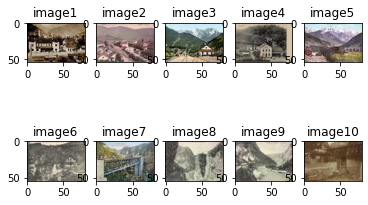

In [82]:
import matplotlib.pyplot as plt
import numpy
from PIL import Image
for i in range(10):
    image = Image.open('6/' + str(i + 600) + '.jpg')
    plt.subplot(2,5,i+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow(image)
    plt.title('image' + str(i +1))